# Notebook Companion for  
<div align="center">
    <em>Pre-Kähler Structures and Finite-Nondegeneracy</em>  
    <br>  
    <strong>Omid Makhmali and David Sykes</strong>  
</div>

---

This notebook accompanies **Section 3** of the article

> **Makhmali, O. and Sykes, D.**  
> *Pre-Kähler Structures and Finite-Nondegeneracy*  

presenting a Computer Algebra System (CAS) implementation of the section's Cartan equivalence method and related computations.

## Preamble
###### i.e., preliminary code to set up the notebook environment (requires dgcv version >= v0.3.2 and SymPy)

In [ ]:
from dgcv import *          # This imports the full standard `dgcv` library
import sympy as sp          # This gives access to the `sympy` library by calling sympy functions with the prefix `sp.`
set_dgcv_settings(format_displays=True, use_latex=True, version_specific_defaults='v0.3.2')     # This sets various default behaviors for `dgcv` functions and Jupyter notebook formatting

# Section 3.1: The structure bundle

Consider a coframe $(\theta^1,\theta^2,\overline{\theta^1},\overline{\theta^2})$ on a neighborhood of $0$ in $\mathbb{C}^2$ satisfying 
$$
\operatorname{d}\theta^1 \equiv \overline{\theta^1}\wedge \theta^2\pmod{\theta^1}
$$
with $\theta^1,\theta^2$ type $(1,0)$ forms, i.e., a 1-*adapted* coframe in the terminology of Section 3.1. Accordingly,
$$
\operatorname{d}\theta^1 = \overline{\theta^1}\wedge \theta^2 + A_{12}^1\theta^1\wedge \theta^2 + A_{1\overline{1}}^1\overline{\theta^1}\wedge \theta^1 + A_{2\overline{1}}^1\theta^2\wedge \overline{\theta^1} + A_{2\overline{2}}^1\theta^2\wedge \overline{\theta^2}
$$
and
$$
\operatorname{d}\theta^2 = A_{21}^1\theta^2\wedge \theta^2 + A_{i\overline{j}}^2\theta^i\wedge \overline{\theta^j}.
$$


## Initializing a *1-adapted* coframe

Let us set up a coframe $(\theta^1,\theta^2,\overline{\theta^1},\overline{\theta^2})$, with $\theta^j$ representing forms as above.

In [2]:
coframe_labels = ['theta1','theta2']
property_markers = {'theta1':{'holomorphic'},'theta2':{'holomorphic'}}
createCoframe('CF',coframe_labels,str_eqns_labels='A',complete_to_complex_cf=True,markers=property_markers,integrable_complex_struct=True)

show(f'We just initialized an abstract coframe (labeled `CF`) with basis 1-forms ${LaTeX(CF)}$ and structure coefficients $${LaTeX(A)}.$$')

<IPython.core.display.Latex object>

In [3]:
show(f'On coframe initialization, we applied some assumptions about which basis forms should be handled as holomorphic by setting `markers`. The optional `integrable_complex_struct=True` keyword intsructs the automated initialization to simplify structure equations under the assumption that the underlying complex structure w.r.t. which holomorphic $1$-forms are distinguished is integrable. The simplified structure equations are {LaTeX_eqn_system(CF.structure_equations,left_prefix=r'\operatorname{d}',add_period=True)}')

<IPython.core.display.Latex object>

Now let's replace some of the general $A_{i\bar{j}}^k$ functions with the corresponding coefficient in
$$
\operatorname{d}\theta^1 = \overline{\theta^1}\wedge \theta^2 + A_{12}^1\theta^1\wedge \theta^2 + A_{1\overline{1}}^1\theta^1\wedge \overline{\theta^1} + A_{1\overline{2}}^1\theta^1\wedge \overline{\theta^2} + A_{2\overline{2}}^1\theta^2\wedge \overline{\theta^2}
$$
and
$$
\operatorname{d}\theta^2 = A_{12}^2\theta^1\wedge \theta^2 + A_{i\overline{j}}^2\theta^i\wedge \overline{\theta^j}.
$$
Internally, $A_{ij}^k$ are assigned string labels of the form `A_low_i_j_hi_k`, and we will target such labels for replacement. 

To replace, we will define a replacement rules dictionary and then pass that to the coframe method `CF.update_structure_equations()`.

In [4]:
subs_rules = {
    A_low_2_3_hi_1:-1
    }
subs_rules_conjugated = {sp.conjugate(k):sp.conjugate(v) for k,v in subs_rules.items()}
CF.update_structure_equations(subs_rules|subs_rules_conjugated)

To test that the coframe `CF` updated correctly, we can take the exterior derivatives of coframe elements using `extDer(,CF)`:

In [5]:
show(f'For example, $$\\operatorname{{d}}\\theta^1 = {LaTeX(extDer(theta1,CF))}$$ and $$\\operatorname{{d}}\\theta^2 = {LaTeX(extDer(theta2,CF))}.$$')

<IPython.core.display.Latex object>

Use `*` to compute wedge products. For example,
$$
\omega = \theta^1\wedge \overline{\theta^1}
$$
is computed by `theta1 * BARtheta1`.

In [6]:
omega = theta1 * BARtheta1
dOmega = extDer(omega,CF)

show(f'We have $$\\omega = {LaTeX(omega)}$$ and $$\\operatorname{{d}}\\omega = {LaTeX(dOmega)}$$')

<IPython.core.display.Latex object>

## Adapting the coframe: *2-adapted* coframes (Section 3.1.3)

With the above expression for $\operatorname{d}\omega$, setting $\operatorname{d}\omega = 0$ yields,
$$
A_{1\bar{2}}^1=-\overline{A_{12}^1}
\quad\text{ and }\quad
A_{2\bar{2}}^1=0.
$$

Let's update the structure equations for `C` accordingly:

In [7]:
subs_rules = {A_low_1_4_hi_1:-sp.conjugate(A_low_1_2_hi_1),A_low_2_4_hi_1:0}
subs_rules_conjugated = {sp.conjugate(k):sp.conjugate(v) for k,v in subs_rules.items()}
CF.update_structure_equations(subs_rules|subs_rules_conjugated)

Recomputing $\omega$ now will yield $\operatorname{d}\omega=0$

In [8]:
omega = theta1 * BARtheta1
dOmega = sp.simplify(extDer(omega,CF))
show(f'With the simplification $$\\operatorname{{d}}\\theta^1 = {LaTeX(extDer(theta1,CF))}$$ and still $$\\omega = {LaTeX(omega)},$$ we get $$\\operatorname{{d}}\\omega = {LaTeX(dOmega)}.$$')

<IPython.core.display.Latex object>

Our next relation comes from $\operatorname{d}^2\theta^1=0$.

In [9]:
diff_form = extDer(theta1,CF,order=2)*theta1
solution_when_set_to_zero = solve_dgcv(extDer(theta1,CF,order=2)*theta1,A_low_2_4_hi_2)[0]
show(f'We have $$0=(\\operatorname{{d}}^2\\theta^1)\\wedge\\theta^1={LaTeX(diff_form)}.$$ Therefore, {LaTeX_eqn_system(solution_when_set_to_zero,add_period=True)}')

<IPython.core.display.Latex object>

Let's update the structure equations for `CF` accordingly, i.e., with $A_{2\bar{2}}^2=-2\overline{A_{12}^1}$:

In [10]:
subs_rules = solution_when_set_to_zero      # reusing the solution computed above
subs_rules_conjugated = {sp.conjugate(k):sp.conjugate(v) for k,v in subs_rules.items()}
CF.update_structure_equations(subs_rules|subs_rules_conjugated)
show(f'Now that we updated the structure equations, direct computation yields $$\\operatorname{{d}}^2\\theta^1={LaTeX(extDer(theta1,CF,order=2))}$$ and $$(\\operatorname{{d}}^2\\theta^1)\\wedge\\theta^1={LaTeX(extDer(theta1,CF,order=2)*theta1)}.$$')

<IPython.core.display.Latex object>

Next let's note a PDE coming from $\operatorname{d}^2\theta^1 =0$ and $\operatorname{d}^2\theta^2 =0$:

In [11]:
formula1 = extDer(theta1,CF,order=2)*theta2
formula2 = extDer(theta2,CF,order=2)*theta1
PDE_formula = sp.simplify(2*formula1 + formula2)
show(f'We have $$0=(\\operatorname{{d}}^2\\theta^1)\\wedge\\theta^2={LaTeX(formula1)}$$ and $$0=(\\operatorname{{d}}^2\\theta^2)\\wedge\\theta^1={LaTeX(formula2)}.$$')
show(f'Combining these yields $$0=2(\\operatorname{{d}}^2\\theta^1)\\wedge\\theta^2 + (\\operatorname{{d}}^2\\theta^2)\\wedge\\theta^1={LaTeX(PDE_formula)}.$$')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Therefore,
$$
{A_{2,\bar1;\bar2}^{2}}-2{A_{1,\bar1;\bar2}^{1}}=3{A_{1,\bar2}^{2}} - {\bar{A}_{1,2}^{1}}
\left({A_{2,\bar1}^{2}} - 2  {A_{1,\bar1}^{1}}\right).
$$

To apply the PDE condition later on, let's use `solve_dgcv` to obtain and store the solution w.r.t. a specified variable for use later on. Then later when we want to apply the PDE constraint, we then simply substitute the stored solution into relevant expressions.

The variable w.r.t. which we would like to solve is a coframe derivative of $A_{2\bar{1}}^2$, so we will use the `coframe_derivative` function to specify such a variable and hand it to the `solve_dgcv` function. 

In [12]:
solve_var = coframe_derivative(A_low_2_3_hi_2,CF,3)
PDE_solution = solve_dgcv(PDE_formula,solve_var)
show(f'We just computed the solution $$\\text{{PDE\\_solution[0]}}={LaTeX(PDE_solution[0])}$$ and stored it in the solution list `PDE_solution`.')

<IPython.core.display.Latex object>

## Adapting the coframe: *3-adapted* coframes (Section 3.1.4)

Let's compute how the coframe `CF` and its structure equations transform under
$$
\theta^2\mapsto \theta^2 + \frac{1}{3}\left(A_{2,\bar 1}^{2}-2A_{1,\bar 1}^{1}\right)\theta^1,
$$
to see that this indeed achieves Section 3.1.4's 3-*adapted* property.

In [13]:
new_theta2 = sp.simplify(theta2+sp.Rational(1,3)*(A_low_2_3_hi_2-2*A_low_1_3_hi_1)*theta1)
new_BARtheta2 = sp.conjugate(new_theta2)
CF_adapted = transform_coframe(CF,{theta2:new_theta2,BARtheta2:new_BARtheta2},CF.forms)      # CF.forms as the 3rd arg will reuse the basis labels from CF
show(f'We just applied the coframe transformations replacing $${LaTeX(theta2)}\\mapsto{LaTeX(new_theta2)}\\quad\\text{{ and }}\\quad{LaTeX(BARtheta2)}\\mapsto{LaTeX(new_BARtheta2)}$$ and labeled the new coframe `CF_adapted`. Next we will compute $\\operatorname{{d}}\\theta^2$ in the new coframe.')

<IPython.core.display.Latex object>

To compute $\operatorname{d}\theta^2$ in the new coframe we run `extDer(theta1,CF_adapted)`. The returned 2-form has a `subs` attribute that we can give `PDE_solution[0]`, which will simplify it under the previously derived PDE constraint.

In [14]:
extD_before_subs = sp.simplify(extDer(theta2,CF_adapted))
extD_after_subs = sp.simplify(extD_before_subs.subs(PDE_solution[0]))
show(f'In the new coframe `CF_adapted`, we get $$\\operatorname{{d}}\\theta^2 = {LaTeX(extD_before_subs)}$$ from direct computation before simplifying, and then simplifying with the previously derived constraints yields $$\\operatorname{{d}}\\theta^2 = {LaTeX(extD_after_subs)}.$$ And note, we still have $$\\operatorname{{d}}\\theta^1 = {LaTeX(sp.simplify(extDer(theta1,CF_adapted)))},$$ which shows how the coefficient of $\\theta^2\\wedge\\overline{{\\theta^1}}$ in $\\operatorname{{d}}\\theta^2$ relates to that of $\\theta^1\\wedge\\overline{{\\theta^1}}$ in $\\operatorname{{d}}\\theta^1$')

<IPython.core.display.Latex object>

The key observation about the previous transformation is that it removed the $\theta^1\wedge\overline{\theta^2}$ term from $\operatorname{d}\theta^2$ and achieved a clear relationship between the coefficient of $\theta^2\wedge\overline{\theta^1}$ in $\operatorname{d}\theta^2$ and that of $\theta^1\wedge\overline{\theta^1}$ in $\operatorname{d}\theta^1$. Hence we have obtained a coframe with structure equations 
$$
    \operatorname{d}\theta^1=\overline{\theta^1}\wedge\theta^2 +B^1_{12}\theta^1\wedge\theta^2+  B^1_{1\bar 1}\theta^1\wedge\overline{\theta^1} - \overline{B^1_{12}}\theta^1\wedge\overline{\theta^2},
$$  
$$
    \operatorname{d}\theta^2=B^2_{12}\theta^1\wedge\theta^2+B^2_{1\bar 1}\theta^1\wedge\overline{\theta^1}+2B^1_{1\bar 1}\theta^2\wedge\overline{\theta^1}-2\overline{B^1_{12}}\theta^2\wedge\overline{\theta^2}
$$
for some functions $B_{ij}^k$.

From now on we will no longer work with the old coframe `CF`, but rather use a new coframe assumed to already statisfy the above normalized form (i.e., 3-*adapted* coframes). In this notebook we will not actually use such 3-*adapted* coframes because in the next section we immediately go to working with a *lifted* 3-*adapted* coframe. Regardless, let's finish this subsection by initializing a 3-*adapted* coframe so that it is at least readily available for expirimentation within this notebook. Let's call the new coframe `CF_3_adapted` and use $B_{ij}^k$ to label structure equations

Warning: we are reusing the labels $\{\theta^j\}$ in `CF_3_adapted`, so computed objects like `extDer(theta1,CF)` and `extDer(theta1,CF_3_adapted)` represent different differential forms. Expressions like `extDer(extDer(theta1,CF),CF_3_adapted)` involving nested coframe derivatives w.r.t. different coframes are supported, but use these carefully, as LaTeX rendering of such objects can have rather subtle demarcations of what they represent.

In [15]:
coframe_labels = ['theta1','theta2']
property_markers = {'theta1':{'holomorphic'},'theta2':{'holomorphic'}}
createCoframe('CF_3_adapted',coframe_labels,str_eqns_labels='B',complete_to_complex_cf=True,markers=property_markers,integrable_complex_struct=True)

subs_rules = {B_low_2_3_hi_1:-1} | {
    B_low_1_4_hi_1:-sp.conjugate(B_low_1_2_hi_1),B_low_2_4_hi_1:0} | {
    B_low_2_4_hi_2:-2*sp.conjugate(B_low_1_2_hi_1)} | {
    B_low_1_4_hi_2:0, B_low_2_3_hi_2: 2*B_low_1_3_hi_1} # New conditions from the change of basis!
subs_rules_conjugated = {sp.conjugate(k):sp.conjugate(v) for k,v in subs_rules.items()}
CF_3_adapted.update_structure_equations(subs_rules|subs_rules_conjugated)

show(f'We just initialized an abstract coframe (labeled `CF_3_adapted`) with basis 1-forms ${LaTeX(CF_3_adapted)}$ and structure equations $$\\operatorname{{d}}\\theta^1 = {LaTeX(extDer(theta1,CF_3_adapted))}$$ and $$\\operatorname{{d}}\\theta^2 = {LaTeX(extDer(theta2,CF_3_adapted))}.$$ Such coframes are $3$-$adapted$.')

<IPython.core.display.Latex object>

## Lifting the coframes (Section 3.1.5)

The 3-*adapted* coframes described in the previous section are only defined at every point up to a $U(1)$ action, and they lift to a unique set of 1-forms on the $U(1)$-bundle over $\mathbb{C}^2$ whose sections are the $3$-adapted coframes.

Let us set up a coframe `CF_canonical`$=(\theta^1,\theta^2,\psi,\overline{\theta^1},\overline{\theta^2})$, with $\theta^j$ representing forms as above and $\psi$ representing a *vertical* form on the $U(1)$-bundle over $\mathbb{C}^2$. It will not be *canonical* at first (as the name suggests) until we perform some final normalizations. Specifcally, there is ambiguity in how $\psi$ is defined, which we resolve in this section.

In [16]:
coframe_labels = ['theta1','theta2','psi']
property_markers = {'theta1':{'holomorphic'},'theta2':{'holomorphic'}, 'psi':{'real'}}
createCoframe('CF_canonical',coframe_labels,str_eqns_labels='C',complete_to_complex_cf=True,markers=property_markers,integrable_complex_struct=True)

subs_rules = {C_low_2_4_hi_1:-1} | {
    globals()[f'C_low_3_{j}_hi_{k}']:0 for j in range(1,6) for k in range(1,6) if f'C_low_3_{j}_hi_{k}' in globals() and ((j,k) not in [(1,1),(2,2)])} | {
    globals()[f'C_low_{j}_3_hi_{k}']:0 for j in range(1,6) for k in range(1,6) if f'C_low_{j}_3_hi_{k}' in globals() and ((j,k) not in [(1,1),(2,2)])} | {
    C_low_1_5_hi_1:-sp.conjugate(C_low_1_2_hi_1),C_low_2_5_hi_1:0} | {
    C_low_2_5_hi_2:-2*sp.conjugate(C_low_1_2_hi_1)} | {
    C_low_1_5_hi_2:0, C_low_2_4_hi_2: 2*C_low_1_4_hi_1} | {     # New 3-adapted conditions from the change of basis!
    C_low_1_3_hi_1:sp.I, C_low_2_3_hi_2:sp.I*2}                 # Maurer–Cartan form conditions
subs_rules_conjugated = {sp.conjugate(k):sp.conjugate(v) for k,v in subs_rules.items()}
CF_canonical.update_structure_equations(subs_rules|subs_rules_conjugated)

show(f'We just initialized an abstract coframe (labeled `CF_canonical`) with basis 1-forms ${LaTeX(CF_canonical)}$ and structure equations $$\\operatorname{{d}}\\theta^1 = {LaTeX(extDer(theta1,CF_canonical))}$$ and $$\\operatorname{{d}}\\theta^2 = {LaTeX(extDer(theta2,CF_canonical))}.$$')

<IPython.core.display.Latex object>

Such $\psi$ is however only naturally defined up real-valued combinations of $\theta^j$ and $\overline{\theta^j}$, i.e., we should replace $\psi$ with the more general formula
$$
\psi \mapsto \psi +x^1\theta^1+x^2\theta^2+x^1\theta^1-\overline{x^1\theta^1+x^2\theta^2}
$$
for some variables $x^j$ representing functions of the total space of the $U(1)$ bundle:

In [17]:
createVariables('x',2)
new_psi = psi + (x1*theta1+x2*theta2)+sp.conjugate(x1*theta1+x2*theta2)     #Purely imaginary!!!
new_str_eqns = transform_coframe(CF_canonical,{psi:new_psi},CF_canonical.forms,min_conj_rules=CF_canonical.min_conj_rules).structure_equations
CF_canonical.update_structure_equations(replace_eqns=new_str_eqns)
show(f'In the updated coframe `CF_canonical`$={LaTeX(CF_canonical)}$ computed by replacing $$\\psi\\mapsto{LaTeX(new_psi)},$$ we have $$\\operatorname{{d}}\\theta^1 = {LaTeX(extDer(theta1,CF_canonical))},$$ and hence we can choose $x_1,x_2$ so that $C_{{1,\\bar{{1}}}}^{{1}}$ and $C_{{1,2}}^{{1}}$ coefficients are absorbed. The choices are obvious at a glance, but let\'s anyway do it programatically.')

<IPython.core.display.Latex object>

In [18]:
equation_to_solve = extDer(theta1,CF_canonical)*theta2*psi
solutions = solve_dgcv(equation_to_solve,x)[0]
show(f'We just solved the equation $$0 = \\operatorname{{d}}\\theta^1\\wedge\\theta^2\\wedge\\psi = {LaTeX(equation_to_solve)},$$ obtaining the solutions $${',\\quad '.join(f'{LaTeX(k)}={LaTeX(v)}' for k,v in solutions.items())}$$')


<IPython.core.display.Latex object>

We will use these solutions now to update the structure equations in `CF_canonical` with appropriately set $x_j$ values. We also relable coefficients in $\operatorname{d}^2\theta^2$ as $T^1$ and $T^2$, matching Section 3. 

One more note, it will be convenient to re-label the coefficients in the $\operatorname{d}\psi$ structure equation as $\operatorname{d}\psi = \sum \psi_{jk}^3\text{[form j]}\wedge\text{[form k]}$, because these coeffs became undesirebly complicated following the $\psi \mapsto \psi +x^1\theta^1+x^2\theta^2+x^1\theta^1-\overline{x^1\theta^1+x^2\theta^2}$ replacement. So we will substitute *new* $\psi$ replacing the old ones. Since $\operatorname{d}\psi$ is semi-basic, we will also roll that into the relabeled coefficients by setting $\psi^3_{jk}=0$ whenever $j$ or $k$ is $3$.

In [19]:
T1 = zeroFormAtom('T_low_1',coframe=CF_canonical)     # new variables T1 and T2 for new coeff labels.
T2 = zeroFormAtom('T_low_2',coframe=CF_canonical)
subs_rules = solutions | {C_low_1_4_hi_2: T1, C_low_1_2_hi_2: T2 + 2*BARC_low_1_4_hi_1} 
subs_rules_conjugated = {sp.conjugate(k):sp.conjugate(v) for k,v in subs_rules.items()}
terms_in_d_psi = [zeroFormAtom(f'psi_low_{j}_{k}_hi_3',coframe=CF_canonical)*CF_canonical.forms[j-1]*CF_canonical.forms[k-1] for j in range(1,6) for k in range(1,6) if f'C_low_{j}_{k}_hi_3' in globals() and 3 not in [j,k]]
equation_replacement = {psi: sum(terms_in_d_psi[1:],terms_in_d_psi[0])}

CF_canonical.update_structure_equations(subs_rules|subs_rules_conjugated,equation_replacement)
show(f'Here are the structure equations in the new canonical connection (labeled `CF_canonical`) with basis 1-forms ${LaTeX(CF_canonical)}$: $$\\operatorname{{d}}\\theta^1 = {LaTeX(extDer(theta1,CF_canonical))},$$  $$\\operatorname{{d}}\\theta^2 = {LaTeX(extDer(theta2,CF_canonical))},$$ and $$\\operatorname{{d}}\\psi = {LaTeX(extDer(psi,CF_canonical))}.$$')

<IPython.core.display.Latex object>

Finaly, let us apply 
$$
    \operatorname{d}^2\theta^j = 0
$$ 
once more together with
$$
\operatorname{d}^2\psi = 0
\quad\text{ and }\quad
\operatorname{d}\psi = \overline{\operatorname{d}\psi}
$$ 
once more to eliminate some of the remaining functions in thes structure equations.

In [20]:
formulas = (sp.simplify(extDer(theta1,CF_canonical,2))).terms+(sp.simplify(extDer(theta2,CF_canonical,2))).terms+(sp.simplify(extDer(psi,CF_canonical,2))).terms+(sp.simplify(extDer(psi,CF_canonical,1)-sp.conjugate(extDer(psi,CF_canonical,1)))).terms

solve_vars = set()
filter_vars = [T2,coframe_derivative(T2,CF_canonical,3),coframe_derivative(T1,CF_canonical,1),coframe_derivative(T2,CF_canonical,4),coframe_derivative(T2,CF_canonical,2)]
for formula in formulas:
    solve_vars |= {var for var in formula.free_symbols if (hasattr(var,'label') and 'hi_3' in var.label) or (hasattr(var,'differential_order') and var.differential_order>0 and 'T_lo' in var.label)}
for var in filter_vars:
    solve_vars.discard(var)
solutions = solve_dgcv(formulas,solve_vars)
subs_rules = solutions[0] 
subs_rules_conjugated = {sp.conjugate(k):sp.conjugate(v) for k,v in subs_rules.items()}
CF_canonical.update_structure_equations(subs_rules | subs_rules_conjugated)
show(f'We just obtained the solutions {LaTeX_eqn_system(solutions[0],one_line=True)} and updated the coframe `CF_canonical` structure equations accordingly.')

<IPython.core.display.Latex object>

In [21]:
show(f'With this last update to the structure equations of `CF_canonical`=${LaTeX(CF_canonical)}$ we get: $$\\operatorname{{d}}\\theta^1 = {LaTeX(extDer(theta1,CF_canonical))},$$  $$\\operatorname{{d}}\\theta^2 = {LaTeX(extDer(theta2,CF_canonical))},$$ and $$\\operatorname{{d}}\\psi = {LaTeX(extDer(psi,CF_canonical))}.$$')

<IPython.core.display.Latex object>

Using that $\psi$ is real-valued, let's impose the constraint that $\operatorname{d}\psi = \overline{\operatorname{d}\psi}$.

In [22]:
formulas = (extDer(psi,CF_canonical) -sp.conjugate(extDer(psi,CF_canonical))).terms
solve_vars = set()
filter_vars = [T2,sp.conjugate(T2)]
for formula in formulas:
    solve_vars |= {var for var in formula.free_symbols if (hasattr(var,'label') and 'hi_3' in var.label) or (hasattr(var,'differential_order') and var.differential_order>0 and 'T_lo' in var.label)}
for var in filter_vars:
    solve_vars.discard(var)
solutions = solve_dgcv(formulas,solve_vars)
subs_rules = solutions[0] 
subs_rules_conjugated = {sp.conjugate(k):sp.conjugate(v) for k,v in subs_rules.items()}
real_condition_constraints = subs_rules | subs_rules_conjugated
CF_canonical.update_structure_equations(real_condition_constraints)
show(f'We just obtained the solutions {LaTeX_eqn_system(solutions[0],one_line=True)} and updated the coframe `CF_canonical` structure equations accordingly.')
show(f'The updated structure equations are: $$\\operatorname{{d}}\\theta^1 = {LaTeX(extDer(theta1,CF_canonical))},$$  $$\\operatorname{{d}}\\theta^2 = {LaTeX(extDer(theta2,CF_canonical))},$$ and $$\\operatorname{{d}}\\psi = {LaTeX(extDer(psi,CF_canonical))}.$$')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Section 3.2: Cartan geometric description

Run the previous notebook section 
>Lifting the coframes (Section 3.1.5)

before running this one. Specifically, we proceed assumng the coframe `CF_canonical` has been initialized (and updated) via the previous section.

The 1-forms in `CF_canonical` define components of an $\mathbb{R}^2\rtimes \mathfrak{sl}_2(\mathbb{R})$-valued Cartan connection, which we can represent using the `DF_representation` class, a `dgcv` class representing $\mathfrak{gl}$-valued differential forms.

In [23]:
phi = DF_representation([[0,0,0],[sp.conjugate(theta1),-sp.I*psi,sp.conjugate(theta2)],[theta1,theta2,sp.I*psi]])
show(f'We have just initialized the Cartan connection $$\\varphi = {LaTeX(phi)}.$$')

<IPython.core.display.Latex object>

In [24]:
curvatureForm = sp.simplify(extDer(phi,CF_canonical) + phi@phi)     # Matrix multiplication is denoted by `@`
show(f'The curvature $2$-form of $\\varphi$ is $$\\operatorname{{d}}\\varphi+\\varphi\\wedge\\varphi = {LaTeX(curvatureForm)}$$')

<IPython.core.display.Latex object>

In [25]:
Bianchi_ID = sp.simplify(extDer(curvatureForm,CF_canonical)+phi@curvatureForm-curvatureForm@phi)
simplified_Bianchi_ID = simplify_with_PDEs(Bianchi_ID,real_condition_constraints)
show(f'The Bianchi identity  $0 = \\operatorname{{d}}\\left(\\operatorname{{d}}\\phi+\\phi\\wedge\\phi\\right)+\\phi\\wedge \\left(\\operatorname{{d}}\\phi+\\phi\\wedge\\phi\\right)-\\left(\\operatorname{{d}}\\phi+\\phi\\wedge\\phi\\right)\\wedge \\phi$ gives $$ 0 = {LaTeX(Bianchi_ID)}$$')
show(f'The Bianchi identity simplifies under the previously derived contraints $${',\\quad '.join(f'{LaTeX(k)}={LaTeX(v)}' for k,v in real_condition_constraints.items())},$$ yielding $$0 = {LaTeX(simplified_Bianchi_ID)}$$')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

To summarize these Bianchi identities, and the previous constraint arising from $\operatorname{d}\psi = \overline{\operatorname{d}\psi}$:

In [26]:
formulas = simplify_with_PDEs(extDer(psi,CF_canonical,2),real_condition_constraints).terms
solve_vars = set()
filter_vars = [T2,sp.conjugate(T2),T1,sp.conjugate(T1)]
for formula in formulas:
    solve_vars |= formula.free_symbols
for var in filter_vars:
    solve_vars.discard(var)
solutions = solve_dgcv(formulas,solve_vars)
Bianchi_IDs = solutions[0] 
Bianchi_IDs |= {sp.conjugate(k):sp.conjugate(v) for k,v in Bianchi_IDs.items()}
show(f'The Bianchi identities and previously solved $\\operatorname{{d}}\\psi = \\overline{{\\operatorname{{d}}\\psi}}$ give {LaTeX_eqn_system(Bianchi_IDs|real_condition_constraints,one_line=True,add_period=True)}')

<IPython.core.display.Latex object>

# Section 3.3: Parametric expressions

This notebook section accompanies the article's Section 3.3.

We begin with a potential $\rho$ and coframe $(\theta^1,\theta^2,\psi,\overline{\theta^1},\overline{\theta^2})$ given by
$$
    \theta^1=\operatorname{i} \sqrt{\rho_{1\overline{1}}}\operatorname{d} z_1+\operatorname{i}\frac{ \rho_{2\overline{1}}}{\sqrt{\rho_{1\overline{1}}}}\operatorname{d} z_2,
    \quad
    \theta^2=A_i\operatorname{d} z_i,
    \quad
    \psi=\varphi+B_i\operatorname{d} z_i+\overline{B_i}\operatorname{d}\overline{z_i}
$$
where $z_1,z_2$ are complex coordinates and $\phi$ represents a real exact 1-form on a local trivialization of a $U(1)$ bundle over $\mathbb{C}^2$ whose restriction to fibers coincides with the Maurer–Cartan form. Specifically, in coordinates $(z_1,z_2,t)$ of the local trivalization, $\phi=\operatorname{d}t$.

The section's computations, however, take place on a section of the $U(1)$ bundle, where the pullback of $\psi$ has the form $$ \psi = B_i\operatorname{d} z_i+\overline{B_i}\operatorname{d}\overline{z_i}$$ and $A_i,B_i$ depend only on $z_i\overline{z_i}$.


Before fully using local coordinates $z_j$ we will start with symbolic representations of their coordinate 1-forms, representing
$$
Z^i:=\operatorname{d} z_i
\quad\text{ and }\quad
\overline{Z^i}:=\operatorname{d} \overline{z_i}.
$$


## Initializing the moving coframe

First we set up the coordinate coframe `CF_coordinate`$=(Z^1,Z^2,\varphi,\overline{Z^1},\overline{Z^2})$ in terms of $\rho$ and then define the adapted coframe $(\theta^1,\theta^2,\psi,\overline{\theta^1},\overline{\theta^2})$ in terms of the coordinate coframe:

In [27]:
coframe_labels = ['Z1','Z2','varphi']
property_markers = {'Z1':{'holomorphic','closed'},'Z2':{'holomorphic','closed'},'varphi':{'closed'}}
createCoframe('CF_coordinate',coframe_labels,str_eqns_labels='Gamma',complete_to_complex_cf=True,markers=property_markers,integrable_complex_struct=True)

show(f'We just initialized an abstract coframe (labeled `CF_coordinate`) with basis 1-forms ${LaTeX(CF_coordinate)}$ and structure coefficients $${LaTeX(Gamma)}.$$')
show(f'On coframe initialization, we applied some assumptions about which basis forms should be handled as holomorphic, which are real, and which are closed by setting the`markers` keyword. The optional `integrable_complex_struct=True` keyword intsructs the automated initialization to simplify structure equations under the assumption that the underlying complex structure w.r.t. which holomorphic DF are distinguished is integrable. Since this represents a coordinate coframe, we set all forms a close, and hence the simplified structure equations are {LaTeX_eqn_system(CF_coordinate.structure_equations,left_prefix=r'\operatorname{d}',add_period=True,one_line=True)}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

To represent $\rho$ we use the `dgcv.zeroFormAtom` class, as it will correctly interact with coframes and exterior derivatives to generate symbolic coframe derivatives.  Furthermore, setting the `DGCV.zeroFormAtom.coframe_independants` attributes let's us represent a function depending only on $(z^1,z^2)$ rather than $(z^1,z^2,t)$.

The best way to initialize such objects is with the `createZeroForm` function:

In [28]:
createZeroForm('rho',assumeReal=True,coframe=CF_coordinate,coframe_independants={CF_coordinate:{2}})  # initialize the zero form rho
rho_1b1 = coframe_derivative(rho,CF_coordinate,0,3)                        # label a coframe derivative of rho that we will need often
rho_2b1 = coframe_derivative(rho,CF_coordinate,1,3)

# we can set coframe independents s.t. coframe derivative by D_phi are 0 because computations are done on a bundle section.
createZeroForm('A',2,coframe=CF_coordinate,coframe_independants={CF_coordinate:{2}})  # initialize zero forms A1 and A2
createZeroForm('B',2,coframe=CF_coordinate,coframe_independants={CF_coordinate:{2}})  # initialize zero forms B1 and B2

theta1 = sp.I*rho_1b1**(sp.Rational(1,2))*Z1+(sp.I*rho_2b1/(rho_1b1**(sp.Rational(1,2))))*Z2
theta2 = A1*Z1+A2*Z2
c_theta1=sp.conjugate(theta1)
c_theta2=sp.conjugate(theta2)
psi = varphi+B1*Z1+B2*Z2+sp.conjugate(B1*Z1+B2*Z2)

show(f'We just initialized abstract zero forms $${',\\quad '.join(LaTeX(obj) for obj in (rho,rho_1b1,rho_2b1)+A+B)}, $$ and the coframe $$(\\theta^1,\\theta^2,\\psi,\\overline{{\\theta^1}},\\overline{{\\theta^2}})=\\left({LaTeX((theta1,theta2,psi))[6:-7]},\\ldots\\right)$$ with $$(\\overline{{\\theta^1}},\\overline{{\\theta^2}})={LaTeX((c_theta1,c_theta2))}.$$ Keep in mind, $Z^j$ represents the coordinate $1$-form $\\operatorname{{d}}z^j$.')

<IPython.core.display.Latex object>

## Constraints on higher order symbolic coframe derivatives of $\rho$

Coframe derivatives such as $\rho_{j_1,\ldots,j_\eta,\bar{k_1},\ldots,\bar{k_\mu}}$ are merely symbolic, so although a zero form expression `expr` given in terms of them may simplify to zero under some substitutions, it does not mean that higher order coframe derivatives of `expr` will. By applying symbolic differentiation iteratively, from one equation involving `rho` we derive additional equations involving its higher order symbolic coframe derivatives. Similarly setting iterated exterior derivatives of `expr` equal to zero yields further constraints on higher order symbolic coframe derivatives of $\rho$. Let's derive such constraints from the first few iterated exterior derivatives of all functions appearing in $\theta^1\wedge\overline{\theta^2}$.

Programatically, we compute `extDer(expr,CF_coordinate,with_canonicalize=True)` and then pass the formula through `solve_dgcv`, which will return constraints on the coframe derivatives. Iterating this, we subsequently give `solve_dgcv` formulas that are simplified subject to the previously computed PDE constraints. And for finer control over the result, we will also prescribe the variables that `solve_dgcv` solves w.r.t.. The `with_canonicalize=True` keyword interchanges coframe derivatives into a canonical order, a normalization step neccessary for programatically recognizing equivalent higher order expressions.

In [29]:
dOmega = sp.simplify(extDer(theta1*c_theta1,CF_coordinate,with_canonicalize=True))
coeff_functions = dOmega.coeffs

show(f'Since $0 = \\operatorname{{d}}\\omega = \\operatorname{{d}}(\\theta^1\\wedge\\overline{{\\theta^1}})$, we have $$0 = \\operatorname{{d}}\\omega = {LaTeX(dOmega)}.$$ The coefficient functions from this 2-form expansion must all be zero, and hence so must their respective coframe derivatives of all higher orders. We can compute such coframe derivatives to get higher order constraints on $\\rho $, i.e., differential corollaries.')
# display_DGCV(f'For example, differentiating the coefficient function equation $$0 = {LaTeX(coeff_functions[0])}$$ yields the differential corollaries $$0 = {',$$ $$0 = '.join([LaTeX(coeff) for coeff in sp.simplify(extDer(coeff_functions[0],CF_coordinate)).coeffs])}$$')



<IPython.core.display.Latex object>

In [30]:
eqns = []               # We'll collect equations to solve in this list
for cf in coeff_functions:
    new_eqns = list(expand_dgcv(eqn) for eqn in sp.simplify(extDer(cf,CF_coordinate,with_canonicalize=True)).coeffs)
    eqns += [cf] + new_eqns            # add the new equations to list we are gathering them in
    show(f'Differentiating $$0 = {LaTeX(cf)}$$ yields the differential corollaries {LaTeX_eqn_system(new_eqns,add_period=True)}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [31]:
solve_eqns_order_4 = eqns

# We manually specify the variables w.r.t. solve (indices 0 and 1 are z1 and z2 partials whereas 3 and 4 correspond to their conjugate partials.)
solve_vars_order_4 = [coframe_derivative(rho,CF_coordinate,0,1,4),
              coframe_derivative(rho,CF_coordinate,0,0,1,4),
              coframe_derivative(rho,CF_coordinate,0,1,1,4),
              coframe_derivative(rho,CF_coordinate,0,1,3,4),
              coframe_derivative(rho,CF_coordinate,0,1,4,4),
              coframe_derivative(rho,CF_coordinate,1,3,4),
              coframe_derivative(rho,CF_coordinate,1,3,3,4),
              coframe_derivative(rho,CF_coordinate,1,1,3,4),
              coframe_derivative(rho,CF_coordinate,1,3,4,4)
              ]
rho_constraints = solve_dgcv(solve_eqns_order_4,solve_vars_order_4)[0]
show(f'Solution to derivatives of coefficient equations in $0=\\operatorname{{d}}\\omega$: {LaTeX_eqn_system(rho_constraints,add_period=True)}')

<IPython.core.display.Latex object>

Differentiating each of these equations once more gives a set of 4 additional higher-order equations:

In [32]:
higher_order_eqns = []
for eqn in  [j for i, j in enumerate(eqns) if i not in (0, 5)]:
    new_eqns = list(expand_dgcv(j) for j in sp.simplify(extDer(eqn,CF_coordinate,with_canonicalize=True).subs(rho_constraints)).coeffs)
    higher_order_eqns += new_eqns

In [33]:
solve_eqns = higher_order_eqns

# We manually specify the variables w.r.t. solve
solve_vars = [coframe_derivative(rho,CF_coordinate,0,0,0,1,4),
              coframe_derivative(rho,CF_coordinate,0,0,1,1,4),
              coframe_derivative(rho,CF_coordinate,0,0,1,3,4),
              coframe_derivative(rho,CF_coordinate,0,0,1,4,4),
              coframe_derivative(rho,CF_coordinate,0,1,1,1,4),
              coframe_derivative(rho,CF_coordinate,0,1,1,3,4),
              coframe_derivative(rho,CF_coordinate,0,1,1,4,4),
              coframe_derivative(rho,CF_coordinate,0,1,3,3,4),
              coframe_derivative(rho,CF_coordinate,0,1,3,4,4),
              coframe_derivative(rho,CF_coordinate,0,1,4,4,4),
              coframe_derivative(rho,CF_coordinate,1,1,1,3,4),
              coframe_derivative(rho,CF_coordinate,1,1,3,3,4),
              coframe_derivative(rho,CF_coordinate,1,1,3,4,4),
              coframe_derivative(rho,CF_coordinate,1,3,3,3,4),
              coframe_derivative(rho,CF_coordinate,1,3,3,4,4),
              coframe_derivative(rho,CF_coordinate,1,3,4,4,4),
              ]
higher_rho_constraints = solve_dgcv(solve_eqns,solve_vars)[0]
show(f'Solution to derivatives of coefficient equations in $0=\\operatorname{{d}}\\omega$: {LaTeX_eqn_system(higher_rho_constraints,add_period=True)}')

<IPython.core.display.Latex object>

## Solving for coefficient functions with Theorem 3.4

Here is $(\operatorname{d}\theta^1 -\overline{\theta^1}\wedge\theta^2)\wedge\theta^1$:

In [34]:
expr = canonicalize((extDer(theta1,CF_coordinate) - c_theta1*theta2)*theta1,with_simplify=True)
expr = sp.simplify(expr.subs(rho_constraints))      # sub in rho constraints and simplify
A2_solution  = solve_dgcv(expr,A2)[0]
A2_solution |= {sp.conjugate(k):sp.conjugate(v) for k,v in A2_solution.items()}         # add conjugate relation
A2_solution = {k:canonicalize(v).subs(rho_constraints) for k,v in A2_solution.items()}  # formatting

show(f'$$\\left(\\operatorname{{d}}\\theta^1-\\overline{{\\theta^1}} \\wedge \\theta^2\\right)\\wedge \\theta^1 = {LaTeX(expr)}$$')
show(f'Solving $\\left(\\operatorname{{d}}\\theta^1-\\overline{{\\theta^1}} \\wedge \\theta^2\\right)\\wedge \\theta^1 = 0 $ yields {LaTeX_eqn_system(A2_solution,one_line=True,add_period=True)}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now we will solve for $B_1$ and $B_2$ using $0=\operatorname{d}\theta^1 + \operatorname{i}\psi\wedge\theta^1+\theta^2\wedge\overline{\theta^1}$ reduced under the previous $A_2$ solution:

In [35]:
expr = canonicalize((extDer(theta1,CF_coordinate) +sp.I*psi*theta1 + theta2*c_theta1),with_simplify=True)
expr = sp.simplify(expr.subs(A2_solution|rho_constraints))      # sub in rho constraints and simplify
B_before_conjugacy  = solve_dgcv(expr,BARB)[0]
conjugacy_relations = sum([[sp.conjugate(k-v),k-v] for k,v in B_before_conjugacy.items()],[])
B_solutions = solve_dgcv(conjugacy_relations,B+BARB)[0]
B_solutions = {k:canonicalize(v).subs(rho_constraints) for k,v in B_solutions.items()}      # formatting


show(f'$$\\operatorname{{d}}\\theta^1+\\operatorname{{i}}\\psi\\wedge\\theta^1-\\overline{{\\theta^1}} \\wedge \\theta^2 ={LaTeX(expr)}$$')
show(f'Solving $\\operatorname{{d}}\\theta^1+\\operatorname{{i}}\\psi\\wedge\\theta^1-\\overline{{\\theta^1}} \\wedge \\theta^2 =0 $ yields {LaTeX_eqn_system(B_solutions,one_line=True,add_period=True)}')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

And here is $(\operatorname{d}\theta^2 + 2\operatorname{i}\psi\wedge\theta^2)\wedge\theta^1$ simplified after substituting the previously derived `rho_constraints`, `A2_solution`, and `B_solutions`, which we use to solve for $A_1$:

In [36]:
expr = canonicalize((extDer(theta2,CF_coordinate) + 2*sp.I*psi*theta2)*theta1,with_simplify=True)
expr_after_simplifying = canonicalize(expr.subs(A2_solution|B_solutions,with_diff_corollaries=True).subs(rho_constraints),with_simplify=True)
A1_solution = solve_dgcv(expr_after_simplifying,A1)[0]
A1_solution |= {sp.conjugate(k):sp.conjugate(v) for k,v in A1_solution.items()}      # add conjugate relation
A1_solution = {k:canonicalize(v).subs(rho_constraints) for k,v in A1_solution.items()}        # formatting

show(f'Here is $\\left(\\operatorname{{d}}\\theta^2+ 2\\operatorname{{i}}\\psi \\wedge \\theta^2\\right)\\wedge \\theta^1$ before simplifying $${LaTeX(expr)},$$ and here it is after simplifying with the $A_2$ and $B_i$ substituted, followed by the previous higher order $\\rho$ constraints: $${LaTeX(expr_after_simplifying)}$$')
show(f'Solving $\\left(\\operatorname{{d}}\\theta^2+ 2\\operatorname{{i}}\\psi \\wedge \\theta^2\\right)\\wedge \\theta^1 =0 $ yields {LaTeX_eqn_system(A1_solution,one_line=True,add_period=True)}')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now we can substitute this $A_1$ back into $B_1$, $B_2$, and $A_2$, and then substitute these now-solved-for values into the definitions of $\theta^2$ and $\psi$.

In [37]:
new_B1 = canonicalize(B_solutions[B1].subs(A1_solution),with_simplify=True)
new_B2 = canonicalize(6*B_solutions[B2].subs(A1_solution|rho_constraints),with_simplify=True)
new_A2 = canonicalize(A2_solution[A2].subs(A1_solution),with_simplify=True)
new_A1 = canonicalize(A1_solution[A1],with_simplify=True)

theta2 = sp.simplify(theta2.subs({A1:new_A1,A2:new_A2}))
c_theta2 = canonicalize(sp.conjugate(theta2),with_simplify=True)
psi = canonicalize(psi.subs({B1:new_B1,B2:new_B2}),with_simplify=True)
varLabels, newVars, formLabels, forms = ['A_1','A_2','B_1','B_2'],[new_A1,new_A2,new_B1,new_B2],[r'\theta^1',r'\theta^2',r'\psi',r'\overline{\theta^1}',r'\overline{\theta^2}'],[theta1,theta2,psi,c_theta1,c_theta2]
show(f' The solved for values are $${',$$ $$'.join(f'{v} = {LaTeX(nv)}' for v,nv in zip(varLabels,newVars))}.$$ The new coframe forms are $${',$$ $$'.join(f'{f} = {LaTeX(nf)}' for f,nf in zip(formLabels,forms))}.$$')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

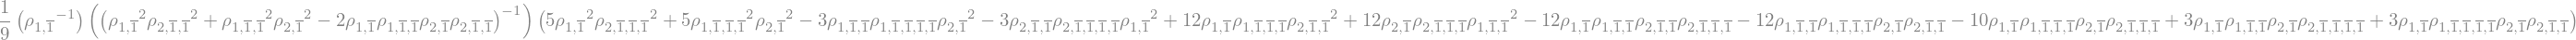

<IPython.core.display.Latex object>

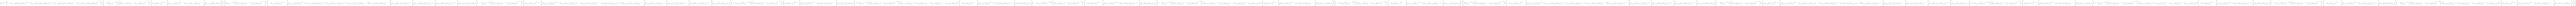

In [38]:
volume_form_coeff = canonicalize((theta1*c_theta1*psi*theta2*c_theta2).coeffs[0],with_simplify=True)
T1_num = canonicalize((extDer(theta2,CF_coordinate)*psi*theta2*c_theta2).coeffs[0],with_simplify=True)
T2_num =canonicalize((extDer(theta2,CF_coordinate)*psi*c_theta1*c_theta2).coeffs[0])
T1,T2 = (T1_num/volume_form_coeff).subs(rho_constraints|higher_rho_constraints), (T2_num/volume_form_coeff).subs(rho_constraints|higher_rho_constraints)
T1 = sp.simplify(T1)
#T2 = sp.simplify(T2)      # This simplify tends to take long time, so supress it unless really necessary
show(f'The solutions for the $T$ invariants are $T_1=$')
show(T1)
show(f' and $T_2 = $')
show(T2)

# Examples and Experimentation Tools

> Prerequisite section: Run Section 3.3 before running this one!

This notebook section contains functions for computing the article's Section 3.3 formulas for any specified potential $\rho$ on coordinate space $(z_1,z_2)\in\mathbb{Z}^2$, with their graphs expressed in coordinates $(w,z_1,z_2)\in\mathbb{Z}^3$.

To begin, we initialize coordinate systems $w=u+\operatorname{i}v$ and $z_j=x_j+\operatorname{i}y_j$, along with a parameter $a$.

## Setup: coordinates and helper functions

Here we initialize the potential formulas $\rho$ and $\rho_a$ from the article's Examples 2.6 and 3.7, but these formulas can be replaced in this notebook with any example of interest.

In [39]:
createVariables('z','x','y',2)      # initializes a complex coordinate system of dimension 2
createVariables('w','u','v')        # initializes a complex coordinate system of dimension 1
createVariables('a')                # initializes a standard coordinate system of dimension 1
flat_graph_formula = model2Nondegenerate([[1]],[[z2]],[z1],w)   # `model2Nondegenerate` is a niche function from the dgcv library, which happens to produce the Example 2.6 formula (2.2b)
flat_rho = sp.simplify(flat_graph_formula+sp.im(w))
parameterized_rho = 2*(sp.re(z1)+1)**a*(sp.re(z2)+1)**(1-a)
show(f'We just initialized coordinate systems ${LaTeX(z)}$, ${LaTeX(w)}$, and ${LaTeX(a)}$, and some pre-Kähler potential examples to explore.')
show(f'The embedded pre-Sasakian hypersurface corresponding to (2.2b) of Example 2.6 is $$\\rho(z_1,z_2,\\overline{{z_1}},\\overline{{z_2}})={LaTeX(flat_rho)}.$$')
show(f'The $a$-parameterized structure corresponding to (2.2a) of Example 2.6 is $$\\rho_a(z_1,z_2,\\overline{{z_1}},\\overline{{z_2}})={LaTeX(parameterized_rho)}.$$')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###### the main helper functions `apply_diff_op` and `abstract_oneForm_to_coordinates`
This notebook's Section 3.3 companion portion features symbolic representations of coframe derivatives of $\rho$ in a coordinate coframe. Expressions involving such objects represent differential operators on $\rho$.
We will now make a helper function that evaluates such differential operators on concrete examples of $\rho$, such as the example potentials `flat_rho` and `parameterized_rho` defined above.

In [40]:
def apply_diff_op(symbolic_op,expr, multiplicity = 1):
    while multiplicity>1:
        expr = apply_diff_op(symbolic_op,expr)
        multiplicity = multiplicity - 1
    VF = [D_z1,D_z2,D_v,conjugate_dgcv(D_z1),conjugate_dgcv(D_z2)]
    gathered_atoms = [elem for elem in symbolic_op.free_symbols if isinstance(elem,zeroFormAtom) and elem.label == 'rho']
    def convert_atom(_expr,ZFAtom):
        if len(ZFAtom.coframe_derivatives)>1:
            raise TypeError('`apply_diff_op` does not support differential operators represented by coframe derivatives with respect to multiple coframes.')
        if ZFAtom.differential_order>0 and ZFAtom.coframe != CF_coordinate:
            raise TypeError('`apply_diff_op` only supports coframe derivatives w.r.t. `CF_coordinate` defined in the notebook section 3.3.')
        if ZFAtom.differential_order==0:
            return _expr
        cofDer = ZFAtom.coframe_derivatives[0][1:]
        for idx in cofDer:
            _expr = VF[idx](_expr)
        return _expr
    subs_rules = {ZFAtom:convert_atom(expr,ZFAtom) for ZFAtom in gathered_atoms}
    new_expr = symbolic_op.subs(subs_rules)
    if hasattr(new_expr,'to_sympy'):
        new_expr = new_expr.to_sympy()
    return new_expr


def abstract_oneForm_to_coordinates(oneForm):
    coframe_replacements = {Z1:d_z1,Z2:d_z2,conjugate_dgcv(Z1):conjugate_dgcv(d_z1),conjugate_dgcv(Z2):conjugate_dgcv(d_z2)}
    coordinate_form = 0*d_z1
    for term in oneForm.terms:
        factors = term.factors
        for k,v in coframe_replacements.items():
            if k in factors:
                coefficient = 1 if len(factors)==1 else allToHol(apply_diff_op(factors[0],rho_example))
                coordinate_form += coefficient*v
    return coordinate_form

######
Here's a simple template for how to use the preceding function `apply_diff_op`:

In [41]:
# template for applying symbolic differential op to a function of z1,z2,BARz1,BARz2

########################
# set parameters
########################
operator = coframe_derivative(rho,CF_coordinate,0)      # put any expression here involving coframe derivatives of rho (as initialized in Section 3.3)
function = flat_rho     # put any real valued function of z1, z2 and their conjugates here
multiplicity = 2        # set this to a positive integer, controlling the number of times the operator will be applied in sequence

########################
# run the following to apply the algorithm
########################
application = apply_diff_op(operator,function,multiplicity)
multiplicity_str = '' if multiplicity==1 else LaTeX(multiplicity)
show(f'Applying the operator $$\\Psi(\\rho) := {LaTeX(operator)}$$ to $$\\rho = {LaTeX(allToHol(function))}$$ yields $$\\Psi^{{{multiplicity_str}}}(\\rho) = {LaTeX(application)}.$$ ')

<IPython.core.display.Latex object>

## Adapted coframes and $T_j$ invariants

For this section, set `rho_example` equal to any real-valued function on $(z_1,z_2)$. We'll use the earlier helper functions `apply_diff_op` and `abstract_oneForm_to_coordinates` to compute the Section 3.3 objects for the example `rho_example`.

It can be defined with formulas involving any combination of `z1`, `z2`, `x1`, `x2`, `y1`, `y2`, `BARz1`, `BARz2`, `conjugate_dgcv(z1)`, and `conjugate_dgcv(z2)`. Note, the latter variables (e.g., `BARz1` and `conjugate_dgcv(z1)`) are different names for the same antiholomorphic coordinate function.

In [42]:
rho_example = parameterized_rho     # set rho_example and then run the subsequent lines to compute related objects
show(f'We have set up the example potential $$\\rho={LaTeX(rho_example)}.$$')

<IPython.core.display.Latex object>

Now, let's compute a $3$-adapted coframe:

In [43]:
theta1_in_coor = abstract_oneForm_to_coordinates(theta1)
theta2_in_coor = abstract_oneForm_to_coordinates(theta1)
show(f'For $$\\rho={LaTeX(rho_example)},$$ the 3-adapted coframe computed in Section 3.3 is given by $$\\theta^1 = {LaTeX(theta1_in_coor)}$$ and $$\\theta^2 = {LaTeX(theta2_in_coor)}.$$')

<IPython.core.display.Latex object>

And let's compute the basic invariants $T_1$ and $T_2$ here. 

The sympy engine we are using struggles to simplify $T_2$ with the parameter $a$, but the expression turns out to be $0$ for all $a$. So to simplify (and shorten) the computation, we will just numerically test the "zero-ness" by sampling a large amount of $a$ values. The following helper function `sample_a_values_and_report_nonzeros` evaluates the general computed $T_2$ function on sampled values of $a$ and 

In [44]:
T1_in_coor = apply_diff_op(T1, rho_example)
T2_in_coor = apply_diff_op(T2, rho_example)

The expressions labeled above as `T1_in_coor` and `T2_in_coor` are the coordinate expressions of the $T_j$ invariants associated to which potential function $\rho$ `rho_example` was set to earlier in this section.

## $T_j$ invariants for $\rho_a$ from Examples 2.6 and 3.7

For the potential $\rho_a$ from Examples 2.6, direct computation of $T_2$ yields a very large expression that is fairly complex in the $a$ parameter. The function is zero however for all $a$, and this program simply doesn't detect that without being guided through some ad-hoc simplication steps. For every fixed $a$, on the other hand, the program does manage the simplification right away. So for demonstration purposes, in the following code block we have the program evaluate $T_2$ for a variable set of $a$-values spread across a variable range. Make sure `rho_example = parameterized_rho` is set in the preceding sections so that the code is initialized applying to the $\rho_a$ formulas.

In [45]:
T1_in_holomorphic_coor = allToHol(sp.simplify(T1_in_coor))  # converts T1 to holomorphic coordinates for display purposes

def sample_a_values_and_report_nonzeros(expr, sample_variable, number_of_samples=100, sample_range=(-2, 2)):
    samples = [sp.Rational((sample_range[1] - sample_range[0]) * j, number_of_samples) + sample_range[0] 
               for j in range( number_of_samples)]

    found_nonzero = False
    nonzero_value = None
    nonzero_sample_point = None
    samples_tested = 0

    for value in samples:
        samples_tested += 1
        if value!=0 and value!=1:
            test_value = expr.subs(sample_variable, value)
            simplified_value = sp.simplify(test_value)
            if simplified_value != 0:
                found_nonzero = True
                nonzero_value = simplified_value
                nonzero_sample_point = value
                break

    return found_nonzero, nonzero_sample_point, nonzero_value, samples_tested, sample_range[0], sample_range[1]

# Sampling test
found_nonzero, nonzero_sample_point, nonzero_value, samples_tested, sr1, sr2 = \
    sample_a_values_and_report_nonzeros(T2_in_coor, a, number_of_samples=1000, sample_range=(-10, 10))

if not found_nonzero:
    T2_message = (f"$T_2$ was found to be zero for every $a$ parameter tested, where {samples_tested} test values "
                  f"were evenly distributed across the range {sr1} to {sr2}.")
else:
    T2_message = (f"$T_2$ had a nonzero value of {nonzero_value} when $a = {nonzero_sample_point}$ "
                  f"(after testing {samples_tested} sample(s)).")


show(f"For $$\\rho={LaTeX(rho_example)},$$ we have $$T_1 = {LaTeX(T1_in_holomorphic_coor)}$$ and {T2_message}")

<IPython.core.display.Latex object>